In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
#load the dataset
df = pd.read_csv("amazon.csv")
df.head

<bound method NDFrame.head of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&P

In [82]:
#initial data inspection
print("Initial Data Info:\n")
print(df.info())
print("\n Initial Data Description:\n")
print(df.describe(include="all"))
print("\nMissing values Before Cleaning:\n")
print(df.isnull().sum())

Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null 

In [83]:
#cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [84]:
# Converting price and discount columns to numeric
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

In [85]:
#changing ruppes to dollars
conversion_rate = 0.011  # 1 INR = 0.011 USD (example rate)

# Create a new column for prices in dollars
df['actual_price_usd'] = (df['actual_price'] * conversion_rate).round(2)
df['discounted_price_usd'] = (df['discounted_price'] * conversion_rate).round(2)

In [86]:
df['actual_price_usd']

0       12.09
1        3.84
2       20.89
3        7.69
4        4.39
        ...  
1460    10.11
1461    33.49
1462    33.88
1463    20.79
1464    40.59
Name: actual_price_usd, Length: 1465, dtype: float64

In [87]:
df['discounted_price_usd']

0        4.39
1        2.19
2        2.19
3        3.62
4        1.69
        ...  
1460     4.17
1461    25.08
1462    24.41
1463    15.39
1464    31.49
Name: discounted_price_usd, Length: 1465, dtype: float64

In [88]:
df['discount_percentage']

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1465, dtype: float64

In [89]:
#dropping inr columns
columns_to_drop = ['actual_price', 'discounted_price']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [90]:
df.head()

,product_id,product_name,category,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,actual_price_usd,discounted_price_usd
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,12.09,4.39
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,3.84,2.19
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,20.89,2.19
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,7.69,3.62
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.39,1.69


In [91]:
# Converting rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [92]:
# Handling missing values
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['rating_count'].fillna(0, inplace=True)

/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/1125264421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)
/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/1125264421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [97]:
# Removing duplicates
df.drop_duplicates(subset='product_id',inplace=True)

In [98]:
# Summary after cleaning
print("\nData Info After Cleaning:\n")
print(df.info())
print("\nData Description After Cleaning:\n")
print(df.describe(include='all'))
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())


Data Info After Cleaning:

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   discount_percentage   1351 non-null   float64
 4   rating                1351 non-null   float64
 5   rating_count          1351 non-null   object 
 6   about_product         1351 non-null   object 
 7   user_id               1351 non-null   object 
 8   user_name             1351 non-null   object 
 9   review_id             1351 non-null   object 
 10  review_title          1351 non-null   object 
 11  review_content        1351 non-null   object 
 12  img_link              1351 non-null   object 
 13  product_link          1351 non-null   object 
 14  actual_price_usd      1351 non-null   float64
 15

In [99]:
df.to_csv('cleaned_amazon.csv', index=True)

/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/1912398453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna(0, inplace=True)


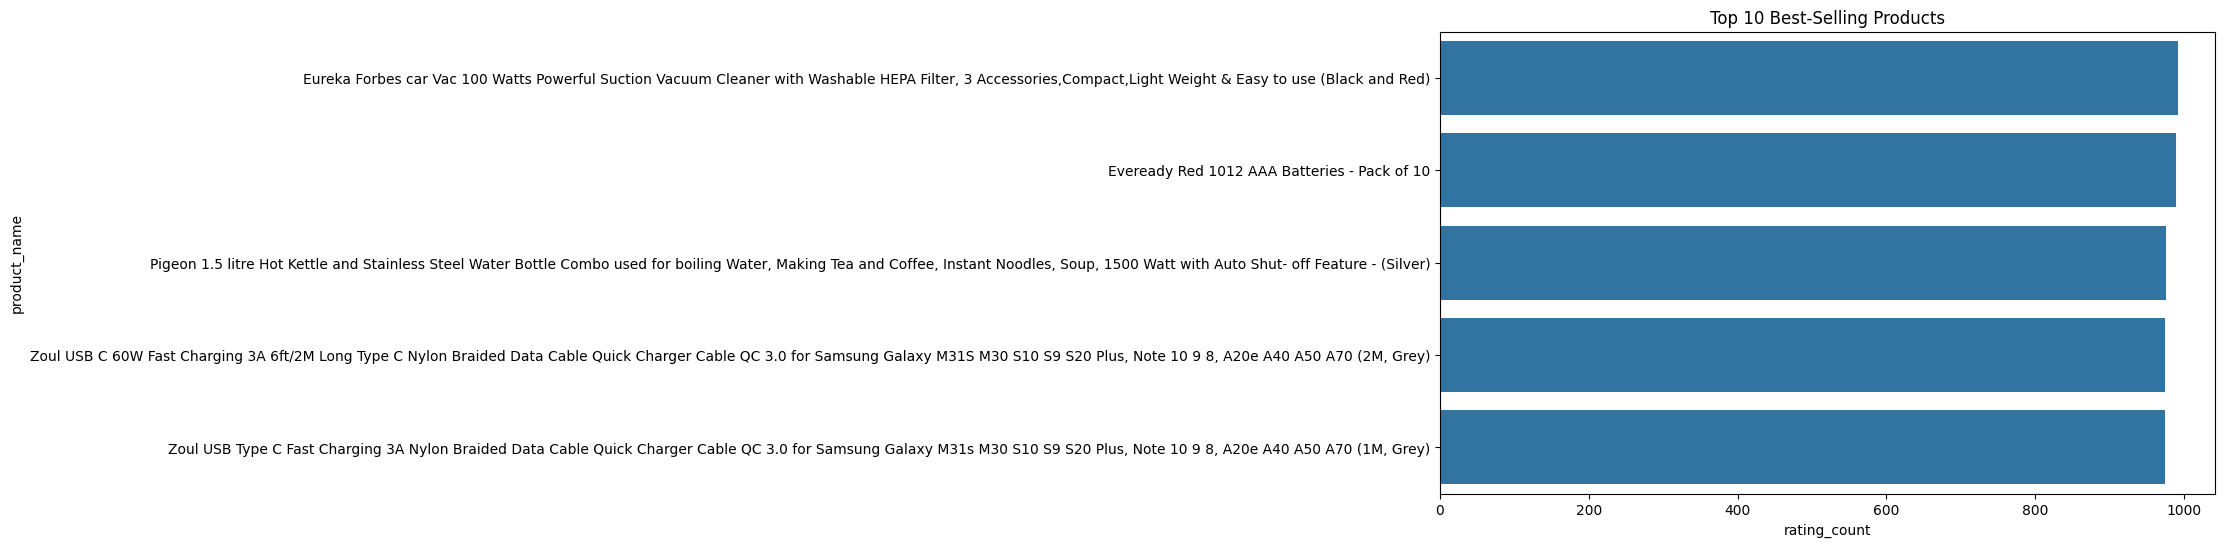

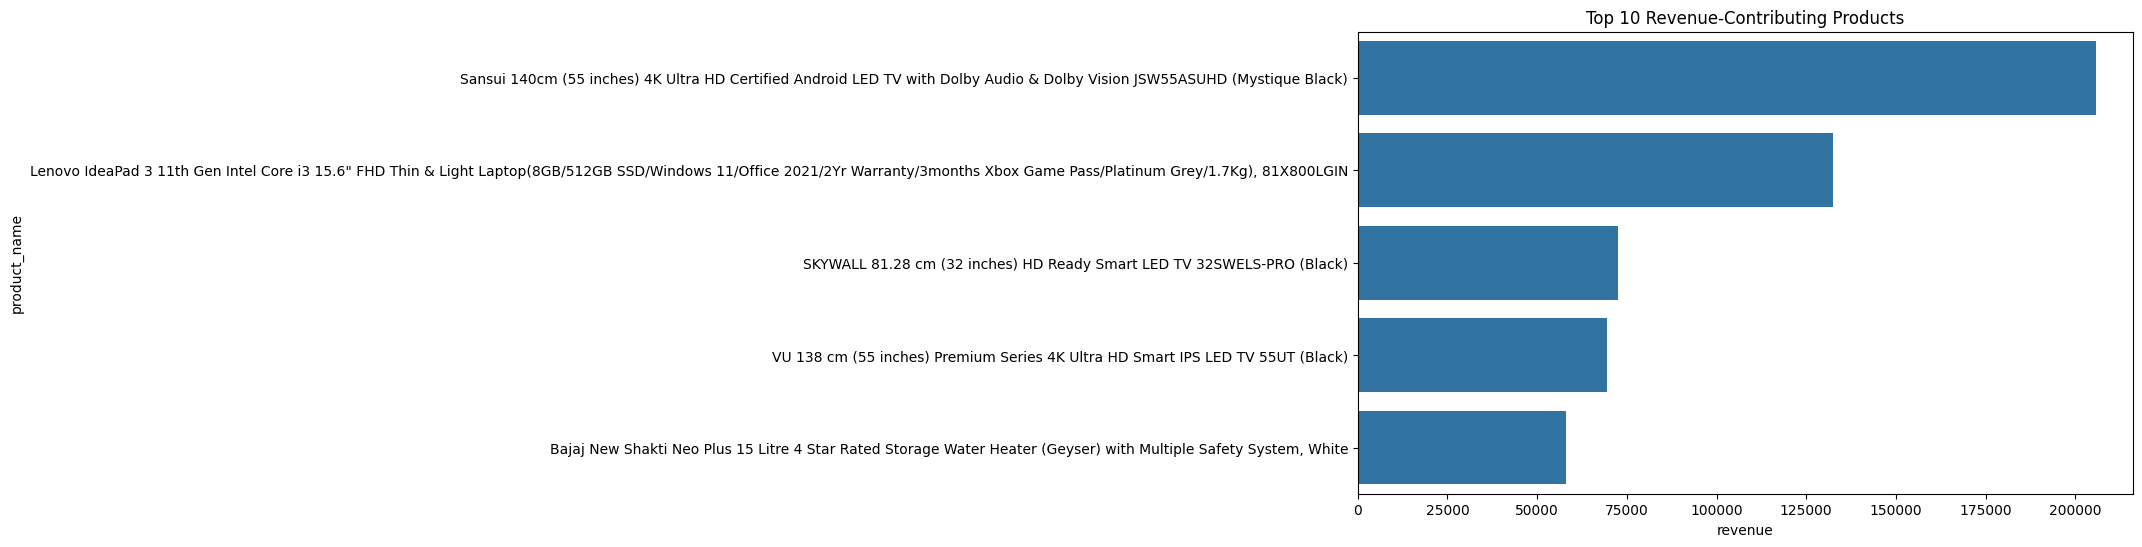

In [59]:
# Sales Performance Visualizations
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating_count'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='rating_count', y='product_name', data=df.sort_values('rating_count', ascending=False).head(5))
plt.title("Top 10 Best-Selling Products")
plt.show()

df['revenue'] = df['discounted_price_usd'] * df['rating_count']
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='product_name', data=df.sort_values('revenue', ascending=False).head(5))
plt.title("Top 10 Revenue-Contributing Products")
plt.show()

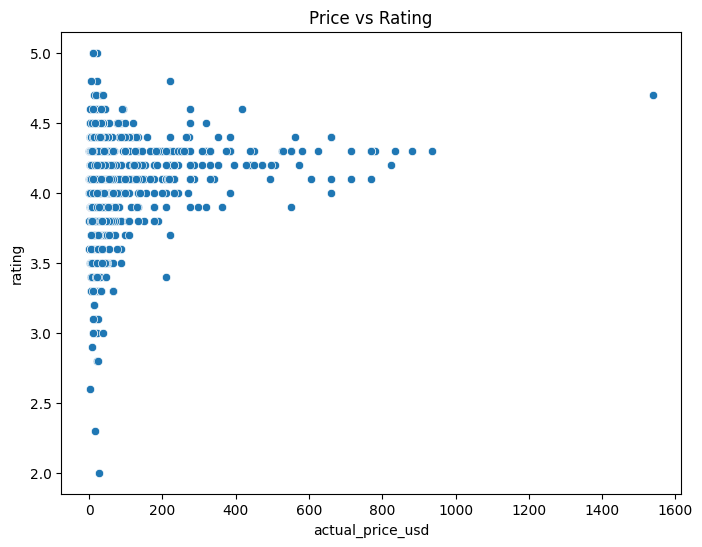

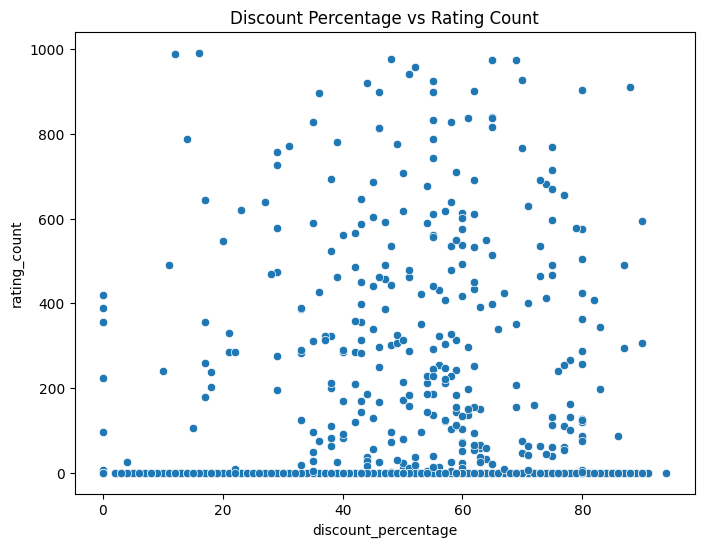

In [61]:
# Pricing Strategy Visualizations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price_usd', y='rating', data=df)
plt.title("Price vs Rating")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount_percentage', y='rating_count', data=df)
plt.title("Discount Percentage vs Rating Count")
plt.show()

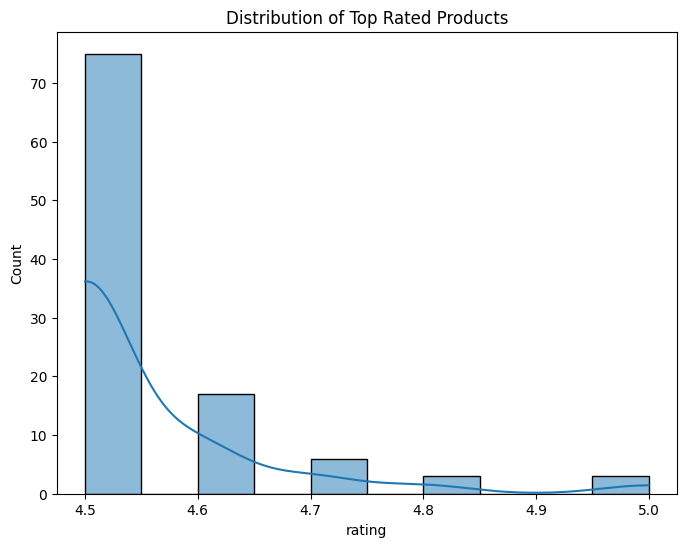

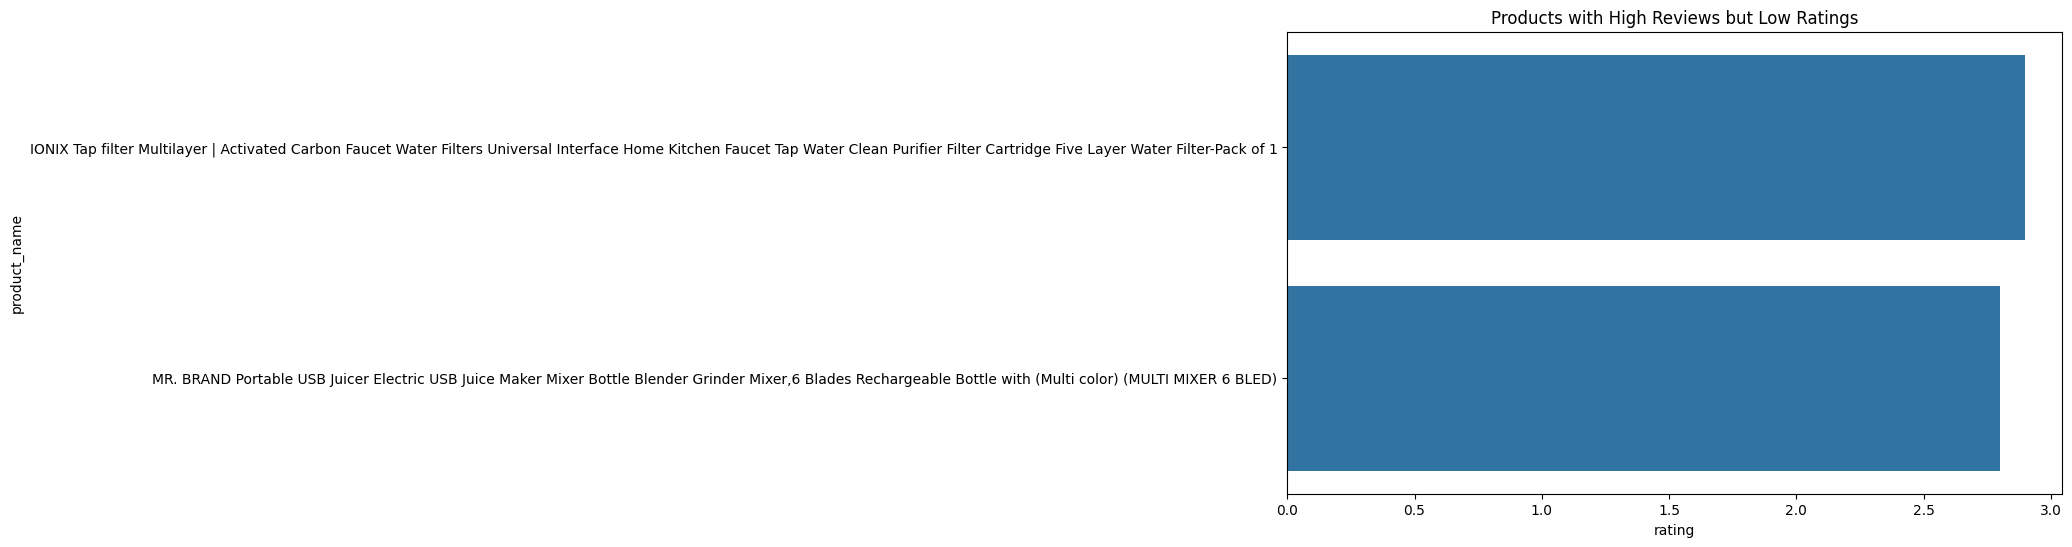

In [62]:
# Customer Satisfaction Visualizations
plt.figure(figsize=(8, 6))
sns.histplot(df[df['rating'] >= 4.5]['rating'], bins=10, kde=True)
plt.title("Distribution of Top Rated Products")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='product_name', data=df[(df['rating'] < 3.0) & (df['rating_count'] > 100)].sort_values('rating_count', ascending=False))
plt.title("Products with High Reviews but Low Ratings")
plt.show()


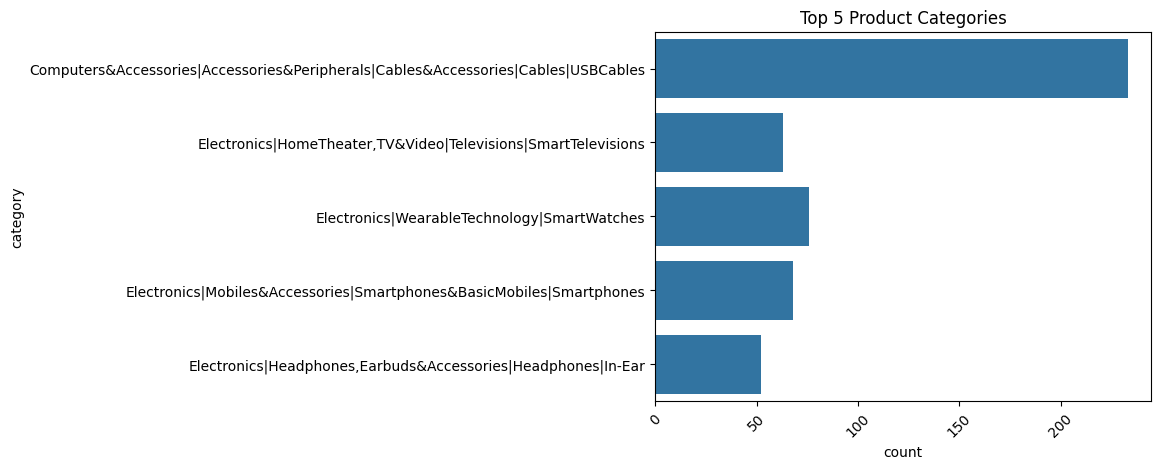

In [76]:
# Category-Level Visualizations
top_5_categories = df['category'].value_counts().head(5)
sns.countplot(y='category', data=df[df['category'].isin(top_5_categories.index)])
plt.xticks(rotation=45)
plt.title('Top 5 Product Categories')
plt.show()

/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/4124429283.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='category', data=top_5_rating, palette='viridis')


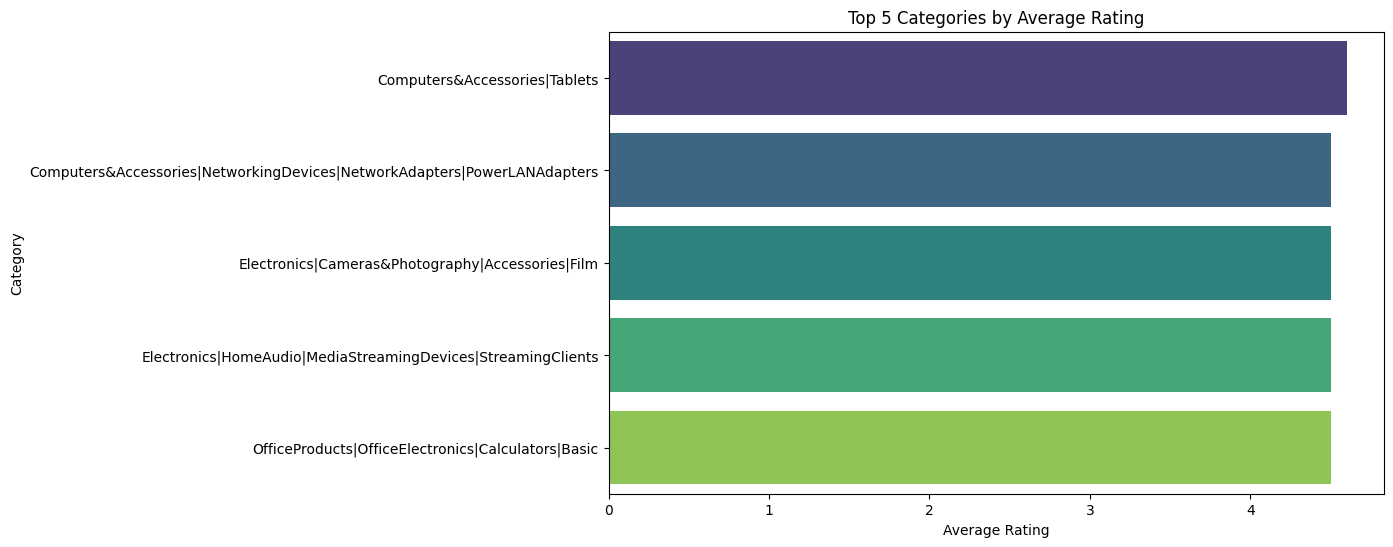

In [77]:
# Grouping and summarizing data
category_summary = df.groupby('category').agg({
    'rating': 'mean',
    'actual_price_usd': 'mean',
    'discount_percentage': 'mean'
}).reset_index()

# Top 5 categories by average rating
top_5_rating = category_summary.sort_values('rating', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='category', data=top_5_rating, palette='viridis')
plt.title("Top 5 Categories by Average Rating")
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/640220534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actual_price_usd', y='category', data=top_5_price, palette='magma')


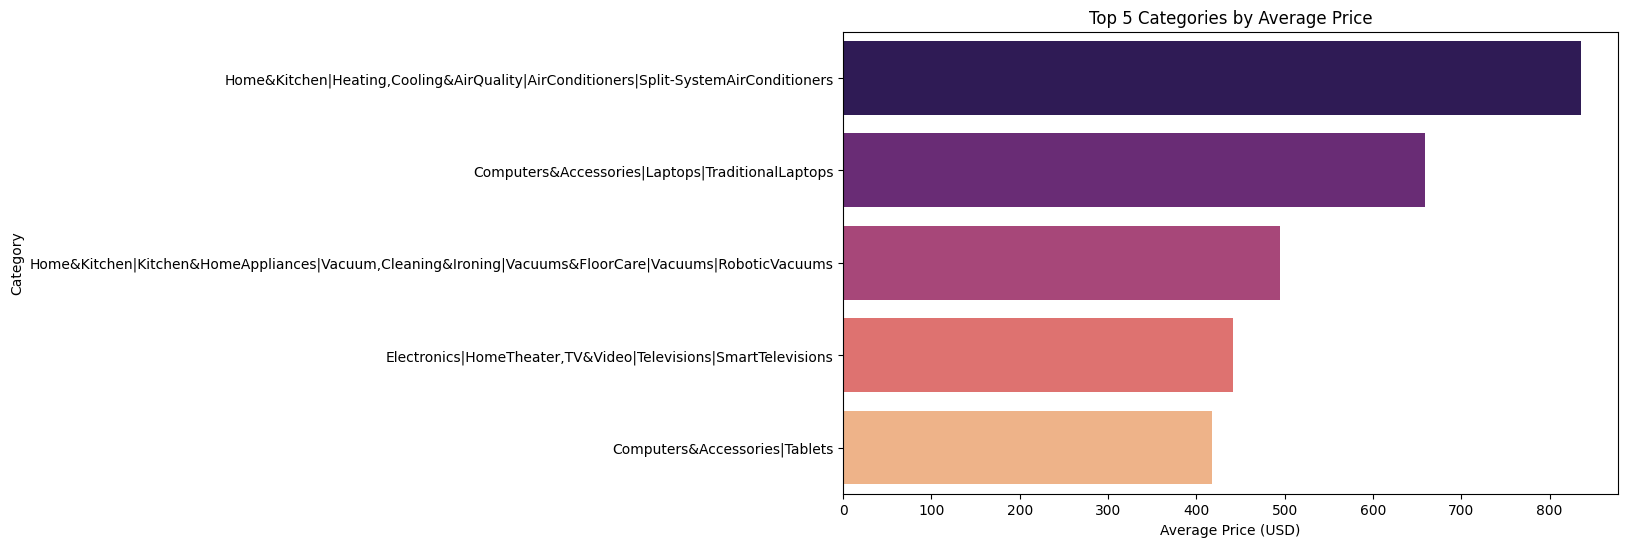

In [78]:
# Top 5 categories by average price
top_5_price = category_summary.sort_values('actual_price_usd', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='actual_price_usd', y='category', data=top_5_price, palette='magma')
plt.title("Top 5 Categories by Average Price")
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')
plt.show()

/var/folders/f8/01mygw315gzf8jlfw68w91b40000gn/T/ipykernel_3825/1113090470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_percentage', y='category', data=top_5_discount, palette='cividis')


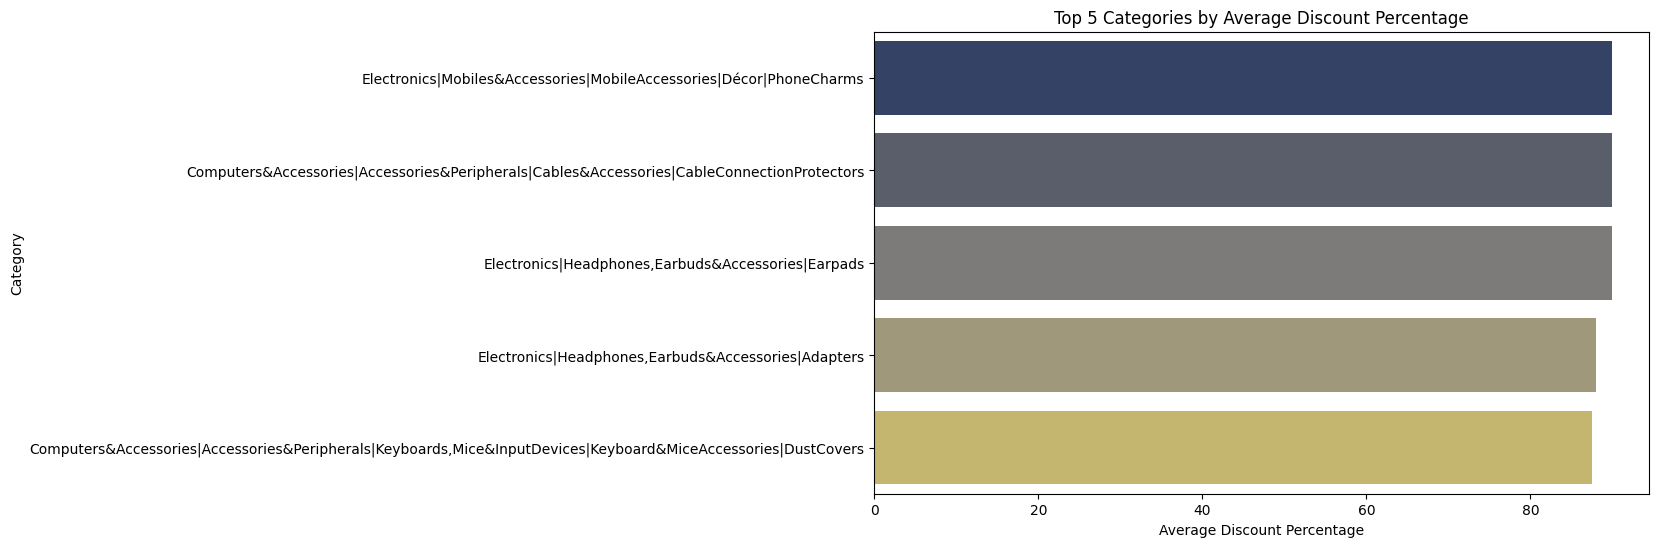

In [79]:
# Top 5 categories by average discount percentage
top_5_discount = category_summary.sort_values('discount_percentage', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='discount_percentage', y='category', data=top_5_discount, palette='cividis')
plt.title("Top 5 Categories by Average Discount Percentage")
plt.xlabel('Average Discount Percentage')
plt.ylabel('Category')
plt.show()